In [27]:
#1. import data
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data.csv')
data.head()
payment = data.loc[:, 'payment']
frequency = data.loc[:, 'frequency']

Text(0.5, 1.0, 'raw data')

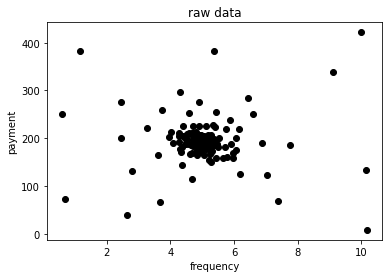

In [28]:
#2.visualize data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(frequency, payment,c='0')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.title('raw data')

In [29]:
X = data
X.head()
frequency.head()
payment.head()

0    197.922
1    197.953
2    194.836
3    189.600
4    189.549
Name: payment, dtype: float64

Text(0, 0.5, 'counts')

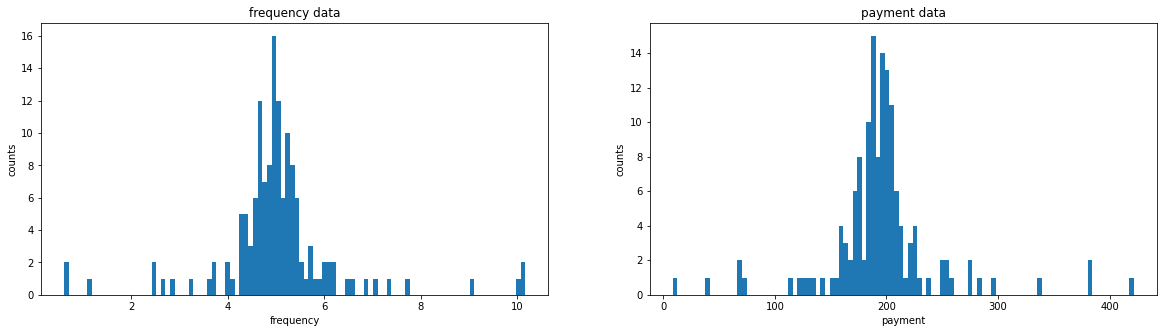

In [30]:
#visualize the data distribution:

fig2 = plt.figure(figsize=(20,5))
fig2_1 = plt.subplot(121)
plt.hist(frequency,bins=100)
plt.title('frequency data')
plt.xlabel('frequency')
plt.ylabel('counts')
fig2_2 = plt.subplot(122)
plt.hist(payment,bins=100)
plt.title('payment data')
plt.xlabel('payment')
plt.ylabel('counts')

In [31]:
# calculate mean and std
f_u = frequency.mean()
f_std = frequency.std()
p_u = payment.mean()
p_std = payment.std()


In [32]:
#calculate normal pdf function
from scipy.stats import norm
f_range = np.linspace(0, 10, 300)
p_range = np.linspace(0,400,300)
f_norm = norm.pdf(f_range, f_u, f_std)
p_norm = norm.pdf(p_range, p_u, p_std)

Text(0, 0.5, 'p(x2)')

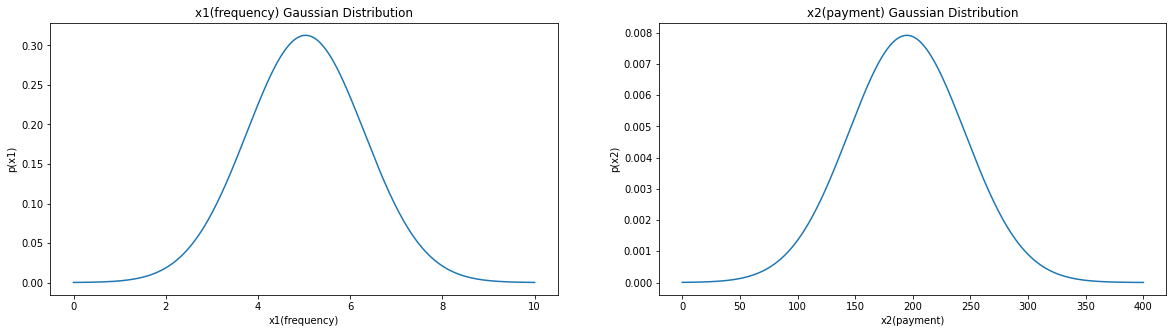

In [33]:
#visualization pdf
fig3 = plt.figure(figsize=(20,5))
fig3_1 = plt.subplot(121)
plt.plot(f_range,f_norm)
plt.title('x1(frequency) Gaussian Distribution')
plt.xlabel('x1(frequency)')
plt.ylabel('p(x1)')
fig3_2 = plt.subplot(122)
plt.plot(p_range, p_norm)
plt.title('x2(payment) Gaussian Distribution')
plt.xlabel('x2(payment)')
plt.ylabel('p(x2)')

In [34]:

import math
#设置范围
x_min, x_max = 0, 10
y_min, y_max = 0, 400
h1 = 0.1
h2 = 0.1
#生成矩阵数据
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
print(xx.shape,yy.shape)

(4000, 100) (4000, 100)


In [38]:
#展开矩阵数据
x_range = np.c_[xx.ravel(), yy.ravel()]
x1 = np.c_[xx.ravel()]
x2 = np.c_[yy.ravel()]
x_range_df = pd.DataFrame(x_range)
#x_range_df.to_csv('data.csv')

In [39]:
#高斯分布参数
u1 = f_u
u2 = p_u
sigma1 = f_std
sigma2 = p_std

In [40]:
#计算高斯分布概率
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow
(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)
p = np.array(p)
#对概率密度维度转化
p_2d = p.reshape(xx.shape[0],xx.shape[1])



<ipython-input-41-f3e469e55400>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes3d = Axes3D(fig5)


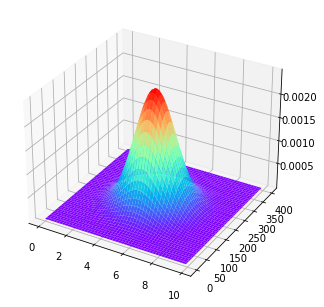

In [41]:
#综合高斯分布概率密度函数的可视化
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig5 = plt.figure()
axes3d = Axes3D(fig5)
axes3d.plot_surface(xx,yy,p_2d,cmap=cm.rainbow)


In [42]:
#建立异常检测模型
from sklearn.covariance import EllipticEnvelope
#an object for detecting outliers
# in a Gaussian distributed dataset.
model = EllipticEnvelope(contamination=0.03)
#    the proportion of outliers in the data set.
#    Range is (0, 0.5).

model.fit(data)

EllipticEnvelope(contamination=0.03)

In [44]:

#模型预测
y_predict = model.predict(data)
print(y_predict)
print(pd.value_counts(y_predict))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 1    137
-1      5
dtype: int64


Text(0, 0.5, 'payment')

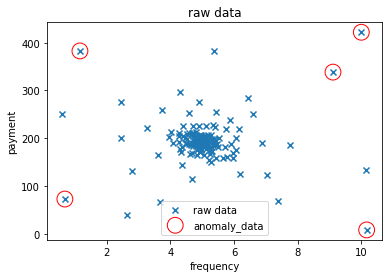

In [52]:
fig6 = plt.figure()
plt.scatter(frequency,payment,marker='x',label='raw data')
plt.scatter(frequency[y_predict == -1],payment[y_predict == -1],marker= 'o',
            facecolor='none',edgecolor='red',s=250,label='anomaly_data')
plt.legend()
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')

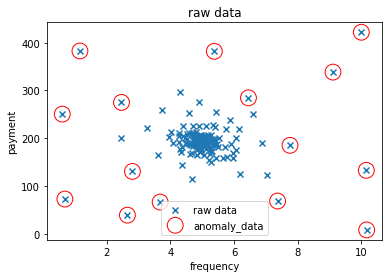

In [53]:

model = EllipticEnvelope(contamination=0.1)
model.fit(X)
#模型预测
y_predict = model.predict(X)
fig7 = plt.figure()
plt.scatter(frequency,payment,marker='x',label='raw data')
plt.scatter(frequency[y_predict == -1],payment[y_predict == -1],marker= 'o',
            facecolor='none',edgecolor='red',s=250,label='anomaly_data')
plt.legend()
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')

plt.show()

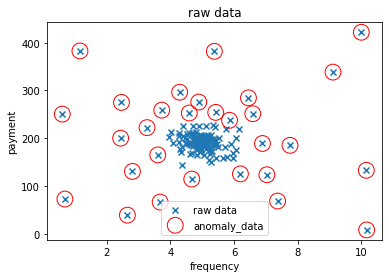

In [57]:

model = EllipticEnvelope(contamination=0.2)
model.fit(X)
#模型预测
y_predict = model.predict(X)
fig8 = plt.figure()
plt.scatter(frequency,payment,marker='x',label='raw data')
plt.scatter(frequency[y_predict == -1],payment[y_predict == -1],marker= 'o',
            facecolor='none',edgecolor='red',s=250,label='anomaly_data')
plt.legend()
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')

plt.show()

In [67]:
fig6.savefig('fig6.jpg')